In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import json
from pprint import pprint
from dotenv import load_dotenv

In [7]:
# API Call
load_dotenv()
API_KEY = os.getenv("Yelp_API") # put your key here if you don't have a .env file in your main project folder.
headers = {'Authorization': 'Bearer %s' % API_KEY}
base_url = "https://api.yelp.com/v3/businesses/search"

3wi12jWPbExarz-hDALTqf7g0OaZQjYgcVVbjCDosN4UeGbQDZQ32WG4P0Da0yv_1NOyTmRYrV3ICWnW5E6Nd_ehH6DZ33dywFjijig4Bq2XciZc9bQkZRZi4oaPX3Yx


In [8]:
# Test call
#search_limit_test = 10
#radius_test = 2000 #radius in meters
#term_test = "restaurants"
#location_test = "Atlanta" #use to test the json response
#search_params_test = {"location": location_test, "term": term_test, "limit": search_limit_test, "radius": radius_test,
                 #"sort_by": "rating"}
#response_test = requests.get(url = base_url, params = search_params_test, headers = headers).json()
#pprint(response_test)

In [9]:
stadium_data_df = pd.read_csv('Resources/stadium_coordinates.csv', dtype={
    "NFL Team": "string",
    "City": "string",
    "State": "string",
    "Stadium Name": "string",
    "Latitude": np.float64,
    "Longitude": np.float64,
    "Zip Code": "string"
})
stadium_data_df = stadium_data_df.dropna()
stadium_data_df

,NFL Team,City,State,Stadium Name,Latitude,Longitude,Zip Code
0,Arizona Cardinals,Glendale,Arizona,State Farm Stadium,33.528000,-112.263000,85305
1,Atlanta Falcons,Atlanta,Georgia,Mercedes-Benz Stadium,33.755556,-84.400000,30313
2,Baltimore Ravens,Baltimore,Maryland,M&T Bank Stadium,39.278056,-76.622778,21230
3,Buffalo Bills,Orchard Park,New York,Bills Stadium,42.774000,-78.787000,14127
4,Carolina Panthers,Charlotte,North Carolina,Bank of America Stadium,35.225833,-80.852778,28202
5,Chicago Bears,Chicago,Illinois,Soldier Field,41.862300,-87.616700,60605
6,Cincinnati Bengals,Cincinatti,Ohio,Paul Brown Stadium,39.095000,-84.516000,45202
7,Cleveland Browns,Cleveland,Ohio,FirstEnergy Stadium,41.506111,-81.699444,44114
8,Dallas Cowboys,Arlington,Texas,AT&T Stadium,32.747778,-97.092778,76011
9,Denver Broncos,Denver,Colorado,Empower Field at Mile High,39.741000,-105.019700,80204


In [10]:
# Make a list of coordinate tuples (lat, lng) for each stadium
stadium_coordinates = list(zip(stadium_data_df["Latitude"], stadium_data_df["Longitude"]))
print(stadium_coordinates)

[(33.528, -112.26299999999999), (33.755556, -84.4), (39.278056, -76.622778), (42.773999999999994, -78.78699999999999), (35.225833, -80.852778), (41.8623, -87.6167), (39.095, -84.516), (41.506111, -81.699444), (32.747778000000004, -97.09277800000001), (39.741, -105.0197), (42.34, -83.045556), (44.501389, -88.06222199999999), (29.684721999999997, -95.410833), (39.760056, -86.16380600000001), (30.323889, -81.6375), (39.048889, -94.483889), (36.090833, -115.18361100000001), (33.95345, -118.3392), (33.95345, -118.3392), (25.958056, -80.238889), (44.974, -93.258), (42.091, -71.264), (29.950833000000003, -90.08111099999999), (40.813528000000005, -74.074361), (40.813528000000005, -74.074361), (39.900833, -75.1675), (40.446667, -80.0158333), (37.403, -121.97), (47.5952, -122.3316), (27.975833, -82.503333), (36.166389, -86.771389), (38.90466305, -76.85866323)]


In [11]:
# Loop to search restaurants around the stadiums
search_limit = 50 #imit to 50 business names per query
radius = 3000 #radius in meters
term = "restaurants"
search_params = {"term": term, "limit": search_limit, "radius": radius, "sort_by": "rating"}
#search_params = {"term": term, "radius": radius, "sort_by": "rating"}
# lists to store the data retrieve from Yelp
business_name = []
business_city = []
business_lat = []
business_lng = []
business_price = []
business_rating = []
business_reviews = []
number_business = []
# Dictionary to create a dataframe from the api request
business_dict = {"Name": business_name, "City": business_city, "Price": business_price, 
                 "Rating": business_rating, "Number of reviews": business_reviews, 
                 "Latitude": business_lat, "Longitude": business_lng}
# list of coordinates to use to test the for loop.
coordinates_test = [(33.528, -112.26299999999999), (33.755556, -84.4)]

In [16]:
# Loop to retrieve the data based on (lat,lng)
for latitude, longitude in stadium_coordinates:
    #print(f"lat = {latitude}")
    #print(f"lng = {longitude}")
    
    search_params.update({"latitude": latitude, "longitude": longitude})
    response = requests.get(url = base_url, params = search_params, headers = headers).json()
    
    number_business.append(response["total"])
    
    #search_params.update({"limit": limite}) 
    pprint(response)
    for i in range(search_limit):
        business_name.append(response['businesses'][i]['name'])
        
     #   if search_limit< limite:
     #       search_limit +=50
     #   else:
        #    print("error")
#
            
    

{'businesses': [{'alias': 'alesha-donuts-glendale',
                 'categories': [{'alias': 'donuts', 'title': 'Donuts'},
                                {'alias': 'juicebars',
                                 'title': 'Juice Bars & Smoothies'},
                                {'alias': 'sandwiches', 'title': 'Sandwiches'}],
                 'coordinates': {'latitude': 33.53712, 'longitude': -112.23953},
                 'display_phone': '(623) 388-4613',
                 'distance': 2411.2311844542664,
                 'id': 'iucnfMFJlkL8sMYW9J0K8A',
                 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/XmtkfjEt5sg4v2BInj3ung/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '8345 W Glendale Ave',
                              'address2': '',
                              'address3': None,
                              'city': 'Glendale',
                              'country': 'US',
                              'display_addres

{'businesses': [{'alias': 'aviva-by-kameel-atlanta-4',
                 'categories': [{'alias': 'mediterranean',
                                 'title': 'Mediterranean'},
                                {'alias': 'mideastern',
                                 'title': 'Middle Eastern'}],
                 'coordinates': {'latitude': 33.7605381455292,
                                 'longitude': -84.3865554648041},
                 'display_phone': '(404) 698-3600',
                 'distance': 1360.7725187761655,
                 'id': 'BSUDAiXd50PAkfFAztVpDw',
                 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/_x61pM4WZiji4d2jq1GnYw/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '225 Peachtree St NE',
                              'address2': 'Ste B-30',
                              'address3': '',
                              'city': 'Atlanta',
                              'country': 'US',
                             

{'businesses': [{'alias': 'joe-bennys-baltimore',
                 'categories': [{'alias': 'italian', 'title': 'Italian'},
                                {'alias': 'pizza', 'title': 'Pizza'},
                                {'alias': 'beer_and_wine',
                                 'title': 'Beer, Wine & Spirits'}],
                 'coordinates': {'latitude': 39.2858595235079,
                                 'longitude': -76.6014964189682},
                 'display_phone': '(443) 835-4866',
                 'distance': 2026.8213619583073,
                 'id': 'UYryiA40L6yj2JX8YZ4G0Q',
                 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/tEVTcQ2VgNnTXjVdWlFSmw/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '313 S High St',
                              'address2': '',
                              'address3': '',
                              'city': 'Baltimore',
                              'country': 'US',
            

                                                  'Baltimore, MD 21201'],
                              'state': 'MD',
                              'zip_code': '21201'},
                 'name': "The Brewer's Art",
                 'phone': '+14105476925',
                 'price': '$$',
                 'rating': 4.0,
                 'review_count': 1017,
                 'transactions': ['delivery', 'pickup'],
                 'url': 'https://www.yelp.com/biz/the-brewers-art-baltimore?adjust_creative=p_7PnMuoKqa0vA7xqYezTg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=p_7PnMuoKqa0vA7xqYezTg'},
                {'alias': 'cazbar-baltimore',
                 'categories': [{'alias': 'turkish', 'title': 'Turkish'},
                                {'alias': 'mediterranean',
                                 'title': 'Mediterranean'},
                                {'alias': 'venues',
                                 'title': 'Venues & Event Spaces'}],
           

{'businesses': [{'alias': 'ichiban-japanese-restaurant-blasdell',
                 'categories': [{'alias': 'japanese', 'title': 'Japanese'},
                                {'alias': 'sushi', 'title': 'Sushi Bars'}],
                 'coordinates': {'latitude': 42.787257,
                                 'longitude': -78.810421},
                 'display_phone': '(716) 828-1881',
                 'distance': 2413.840250864489,
                 'id': 'RvibP9CrVHWJUyqXJmxiRA',
                 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/TjuKjWr2Drsn2qqTGfa_bQ/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '3701 Mckinley Pkwy',
                              'address2': '',
                              'address3': '',
                              'city': 'Blasdell',
                              'country': 'US',
                              'display_address': ['3701 Mckinley Pkwy',
                                                  'Bla

                              'zip_code': '14127'},
                 'name': 'Subway',
                 'phone': '+17168217827',
                 'price': '$',
                 'rating': 2.5,
                 'review_count': 3,
                 'transactions': ['delivery', 'pickup'],
                 'url': 'https://www.yelp.com/biz/subway-orchard-park-5?adjust_creative=p_7PnMuoKqa0vA7xqYezTg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=p_7PnMuoKqa0vA7xqYezTg'},
                {'alias': 'burger-king-blasdell',
                 'categories': [{'alias': 'burgers', 'title': 'Burgers'},
                                {'alias': 'hotdogs', 'title': 'Fast Food'}],
                 'coordinates': {'latitude': 42.770901, 'longitude': -78.81086},
                 'display_phone': '',
                 'distance': 1976.217123703177,
                 'id': 'vRJQFGXuYnWPAi_nlWPARw',
                 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/FLg_15w6Meq7NQp8mqKT

                              'city': 'Charlotte',
                              'country': 'US',
                              'display_address': ['1400 S Church St',
                                                  'Ste A',
                                                  'Charlotte, NC 28203'],
                              'state': 'NC',
                              'zip_code': '28203'},
                 'name': 'Seoul Food Meat Company',
                 'phone': '+19802995143',
                 'price': '$$',
                 'rating': 4.0,
                 'review_count': 1239,
                 'transactions': ['delivery'],
                 'url': 'https://www.yelp.com/biz/seoul-food-meat-company-charlotte?adjust_creative=p_7PnMuoKqa0vA7xqYezTg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=p_7PnMuoKqa0vA7xqYezTg'},
                {'alias': 'queen-city-bites-and-crafts-charlotte',
                 'categories': [{'alias': 'burgers', 'title': 'Burgers'}

                 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/jyiBd2PXwezUnU4jONF_gQ/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '2105 S Jefferson St',
                              'address2': 'Ste A',
                              'address3': None,
                              'city': 'Chicago',
                              'country': 'US',
                              'display_address': ['2105 S Jefferson St',
                                                  'Ste A',
                                                  'Chicago, IL 60616'],
                              'state': 'IL',
                              'zip_code': '60616'},
                 'name': 'Qiao Lin Hotpot',
                 'phone': '+13126009779',
                 'rating': 5.0,
                 'review_count': 50,
                 'transactions': [],
                 'url': 'https://www.yelp.com/biz/qiao-lin-hotpot-chicago-2?adjust_creative=p_7PnMuoKqa0vA7x

                 'review_count': 867,
                 'transactions': ['delivery'],
                 'url': 'https://www.yelp.com/biz/senate-cincinnati-3?adjust_creative=p_7PnMuoKqa0vA7xqYezTg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=p_7PnMuoKqa0vA7xqYezTg'},
                {'alias': 'please-cincinnati',
                 'categories': [{'alias': 'newamerican',
                                 'title': 'American (New)'},
                                {'alias': 'bars', 'title': 'Bars'},
                                {'alias': 'gluten_free',
                                 'title': 'Gluten-Free'}],
                 'coordinates': {'latitude': 39.11143, 'longitude': -84.51317},
                 'display_phone': '(513) 405-8859',
                 'distance': 1843.2545089505375,
                 'id': 'rcyN6Wxz_zWT3O63a18sfA',
                 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/c4qgeBqqf3iEeykpi2bv6Q/o.jpg',
                 'is_closed':

                 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/Y96leUGvMMNJRV5YrXjtVg/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '1424 Hamilton Ave',
                              'address2': '',
                              'address3': '',
                              'city': 'Cleveland',
                              'country': 'US',
                              'display_address': ['1424 Hamilton Ave',
                                                  'Cleveland, OH 44114'],
                              'state': 'OH',
                              'zip_code': '44114'},
                 'name': "Barrister's Deli",
                 'phone': '+12166212622',
                 'price': '$',
                 'rating': 4.5,
                 'review_count': 47,
                 'transactions': ['delivery', 'pickup'],
                 'url': 'https://www.yelp.com/biz/barristers-deli-cleveland-5?adjust_creative=p_7PnMuoKqa0vA7xqYezTg&utm_c

                 'url': 'https://www.yelp.com/biz/sushi-and-ramen-japanese-restaurant-arlington?adjust_creative=p_7PnMuoKqa0vA7xqYezTg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=p_7PnMuoKqa0vA7xqYezTg'},
                {'alias': 'burgerfi-arlington-2',
                 'categories': [{'alias': 'burgers', 'title': 'Burgers'},
                                {'alias': 'hotdog', 'title': 'Hot Dogs'},
                                {'alias': 'newamerican',
                                 'title': 'American (New)'}],
                 'coordinates': {'latitude': 32.7631257085574,
                                 'longitude': -97.0963620840562},
                 'display_phone': '(682) 238-3737',
                 'distance': 1739.1854694019992,
                 'id': 'OEsXp-EQj2v_l0JxA2gBcA',
                 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/vZfQGlESepP94UQe4ameyw/o.jpg',
                 'is_closed': False,
                 'location': {'add

                 'is_closed': False,
                 'location': {'address1': '909 17th St',
                              'address2': '',
                              'address3': '',
                              'city': 'Denver',
                              'country': 'US',
                              'display_address': ['909 17th St',
                                                  'Denver, CO 80202'],
                              'state': 'CO',
                              'zip_code': '80202'},
                 'name': 'Panzano',
                 'phone': '+13032963525',
                 'price': '$$$',
                 'rating': 4.5,
                 'review_count': 1021,
                 'transactions': ['delivery', 'pickup'],
                 'url': 'https://www.yelp.com/biz/panzano-denver?adjust_creative=p_7PnMuoKqa0vA7xqYezTg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=p_7PnMuoKqa0vA7xqYezTg'},
                {'alias': 'briar-common-brewery

{'businesses': [{'alias': 'chartreuse-detroit',
                 'categories': [{'alias': 'newamerican',
                                 'title': 'American (New)'},
                                {'alias': 'tapasmallplates',
                                 'title': 'Tapas/Small Plates'},
                                {'alias': 'cocktailbars',
                                 'title': 'Cocktail Bars'}],
                 'coordinates': {'latitude': 42.36054, 'longitude': -83.06595},
                 'display_phone': '(313) 818-3915',
                 'distance': 2833.5463228768244,
                 'id': 'Xm2A4Xyd-dw4x86qZCV3hw',
                 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/IN9MzarUkOkRA2D2NejeTw/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '15 E Kirby St',
                              'address2': 'Ste D',
                              'address3': '',
                              'city': 'Detroit',
               

                                {'alias': 'danceclubs', 'title': 'Dance Clubs'},
                                {'alias': 'seafood', 'title': 'Seafood'}],
                 'coordinates': {'latitude': 42.33447, 'longitude': -83.047077},
                 'display_phone': '(313) 962-8800',
                 'distance': 627.487365444807,
                 'id': 'oeomzExb17rIkur7hNK-HQ',
                 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/lVhPdObhctPOQ1PDbu8kcQ/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '1250 Library St',
                              'address2': None,
                              'address3': '',
                              'city': 'Detroit',
                              'country': 'US',
                              'display_address': ['1250 Library St',
                                                  'Detroit, MI 48226'],
                              'state': 'MI',
                              'zip_code

                              'city': 'Green Bay',
                              'country': 'US',
                              'display_address': ['2476 S Oneida St',
                                                  'Green Bay, WI 54304'],
                              'state': 'WI',
                              'zip_code': '54304'},
                 'name': 'QDOBA Mexican Eats',
                 'phone': '+19209650602',
                 'price': '$$',
                 'rating': 4.0,
                 'review_count': 13,
                 'transactions': ['delivery'],
                 'url': 'https://www.yelp.com/biz/qdoba-mexican-eats-green-bay-2?adjust_creative=p_7PnMuoKqa0vA7xqYezTg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=p_7PnMuoKqa0vA7xqYezTg'},
                {'alias': 'noodles-and-company-green-bay',
                 'categories': [{'alias': 'salad', 'title': 'Salad'},
                                {'alias': 'noodles', 'title': 'Noodles'},
     

                              'state': 'TX',
                              'zip_code': '77030'},
                 'name': 'Kolache Factory',
                 'phone': '+17137909992',
                 'price': '$',
                 'rating': 4.0,
                 'review_count': 62,
                 'transactions': ['delivery'],
                 'url': 'https://www.yelp.com/biz/kolache-factory-houston-14?adjust_creative=p_7PnMuoKqa0vA7xqYezTg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=p_7PnMuoKqa0vA7xqYezTg'},
                {'alias': 'morningside-thai-houston-3',
                 'categories': [{'alias': 'thai', 'title': 'Thai'}],
                 'coordinates': {'latitude': 29.69593083,
                                 'longitude': -95.41619633},
                 'display_phone': '(713) 661-4400',
                 'distance': 1351.0221885516041,
                 'id': 'PyNPd2BVK-bar3Idc_Dtuw',
                 'image_url': 'https://s3-media3.fl.yelpcdn.com/

                 'display_phone': '(317) 636-7662',
                 'distance': 1569.8542368084743,
                 'id': 'NhXS2YbDi3N1IrIl0bcnpg',
                 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/yDV_K7P2oLGIJwEJiy27Wg/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '333 Massachusetts Ave',
                              'address2': '',
                              'address3': '',
                              'city': 'Indianapolis',
                              'country': 'US',
                              'display_address': ['333 Massachusetts Ave',
                                                  'Indianapolis, IN 46204'],
                              'state': 'IN',
                              'zip_code': '46204'},
                 'name': 'Bazbeaux Pizza',
                 'phone': '+13176367662',
                 'price': '$$',
                 'rating': 4.0,
                 'review_count': 622,
               

                 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/GyWr8vowyjxYombNOWi4yQ/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '101 E Bay St',
                              'address2': '',
                              'address3': None,
                              'city': 'Jacksonville',
                              'country': 'US',
                              'display_address': ['101 E Bay St',
                                                  'Jacksonville, FL 32202'],
                              'state': 'FL',
                              'zip_code': '32202'},
                 'name': 'Cowford Chophouse',
                 'phone': '+19048626464',
                 'price': '$$$',
                 'rating': 4.0,
                 'review_count': 350,
                 'transactions': ['pickup', 'delivery'],
                 'url': 'https://www.yelp.com/biz/the-cowford-chophouse-jacksonville?adjust_creative=p_7PnMuoKqa0vA7xqYe

IndexError: list index out of range

In [17]:
print(number_business)

[94, 707, 667, 51, 441, 1400, 458, 354, 210, 574, 531, 120, 180, 354, 175, 17, 94, 707, 667, 51, 441, 1400, 458, 354, 210, 574, 531, 120, 180, 354, 175, 17]


In [18]:
#Add number of businesses to the data frame
stadium_data_df["Number of restaurants"]=number_business

In [19]:
stadium_data_df

,NFL Team,City,State,Stadium Name,Latitude,Longitude,Zip Code,Number of restaurants
0,Arizona Cardinals,Glendale,Arizona,State Farm Stadium,33.528000,-112.263000,85305,94
1,Atlanta Falcons,Atlanta,Georgia,Mercedes-Benz Stadium,33.755556,-84.400000,30313,707
2,Baltimore Ravens,Baltimore,Maryland,M&T Bank Stadium,39.278056,-76.622778,21230,667
3,Buffalo Bills,Orchard Park,New York,Bills Stadium,42.774000,-78.787000,14127,51
4,Carolina Panthers,Charlotte,North Carolina,Bank of America Stadium,35.225833,-80.852778,28202,441
5,Chicago Bears,Chicago,Illinois,Soldier Field,41.862300,-87.616700,60605,1400
6,Cincinnati Bengals,Cincinatti,Ohio,Paul Brown Stadium,39.095000,-84.516000,45202,458
7,Cleveland Browns,Cleveland,Ohio,FirstEnergy Stadium,41.506111,-81.699444,44114,354
8,Dallas Cowboys,Arlington,Texas,AT&T Stadium,32.747778,-97.092778,76011,210
9,Denver Broncos,Denver,Colorado,Empower Field at Mile High,39.741000,-105.019700,80204,574


In [20]:
# 15000 meters (10 miles) radius
big_radius = 15000 #radius in meters
search_params_big = {"term": term, "limit": search_limit, "radius": big_radius, "sort_by": "rating"}
big_number_business = []
for latitude, longitude in stadium_coordinates:
        
    search_params_big.update({"latitude": latitude, "longitude": longitude})
    response2 = requests.get(url = base_url, params = search_params_big, headers = headers).json()
    
    big_number_business.append(response2["total"])

In [21]:
print(big_number_business)

[1900, 3600, 2900, 1300, 2100, 6400, 1700, 1600, 2100, 3800, 2300, 443, 3900, 2000, 1700, 1500, 4500, 10600, 10600, 3800, 2600, 638, 2200, 18300, 18300, 5100, 2100, 3900, 4200, 2000, 2000, 1500]


In [23]:
stadium_data_df['Number of restaurants in the city'] = big_number_business
stadium_data_df

,NFL Team,City,State,Stadium Name,Latitude,Longitude,Zip Code,Number of restaurants,Number of restaurants in the city
0,Arizona Cardinals,Glendale,Arizona,State Farm Stadium,33.528000,-112.263000,85305,94,1900
1,Atlanta Falcons,Atlanta,Georgia,Mercedes-Benz Stadium,33.755556,-84.400000,30313,707,3600
2,Baltimore Ravens,Baltimore,Maryland,M&T Bank Stadium,39.278056,-76.622778,21230,667,2900
3,Buffalo Bills,Orchard Park,New York,Bills Stadium,42.774000,-78.787000,14127,51,1300
4,Carolina Panthers,Charlotte,North Carolina,Bank of America Stadium,35.225833,-80.852778,28202,441,2100
5,Chicago Bears,Chicago,Illinois,Soldier Field,41.862300,-87.616700,60605,1400,6400
6,Cincinnati Bengals,Cincinatti,Ohio,Paul Brown Stadium,39.095000,-84.516000,45202,458,1700
7,Cleveland Browns,Cleveland,Ohio,FirstEnergy Stadium,41.506111,-81.699444,44114,354,1600
8,Dallas Cowboys,Arlington,Texas,AT&T Stadium,32.747778,-97.092778,76011,210,2100
9,Denver Broncos,Denver,Colorado,Empower Field at Mile High,39.741000,-105.019700,80204,574,3800


In [33]:
stadium_names = list(stadium_data_df["Stadium Name"])


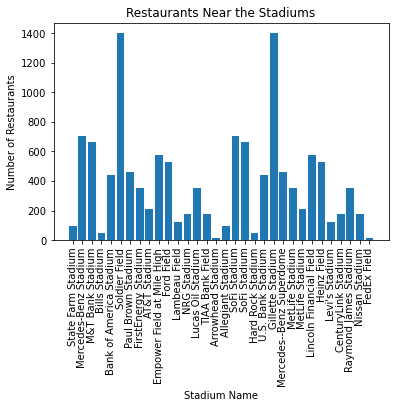

In [39]:
y_pos = np.arange(len(stadium_names))
plt.bar(y_pos, number_business)
plt.xticks(y_pos, stadium_names, rotation = 90)
plt.title("Restaurants Near the Stadiums")
plt.xlabel("Stadium Name")
plt.ylabel("Number of Restaurants")
plt.show()
